In [7]:
#Source: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Project #5: Act Report -- "We Rate Dogs"

The purpose of this project was to wranlge data from the "We Rate Dogs" Twitter archive and to analyze the data to find any interesting insights. Below, you can find my analysis of this data.

# Analysis & Data Visualization

In [12]:
#Load the clean twitter_archive_master data file. 
df = pd.read_excel(r'/Users/holly/Desktop/PyJupyterNB/UDACITY Data Analyst/Project5/twitter_archive_master.xlsx')

**INSIGHT #1:** 

The first thing I decided to look at was the source of the data, or the platform through which the data was posted. 

The majority of users posted to "We Rate Dogs" via Twitter for iPhone across all three years. While a small percentage of users also posted via TweetDeck and Twitter Web Client in 2015 and 2016, however, by 2017, the percentage of tweets from these platforms was practically non-existent. See Table 2.

**Table 1: Counts of Dog Images posted to the "We Rate Dogs" Twitter site by Source**

In [18]:
source = df.groupby(['source','year']).tweet_id.count()
source

source              year
TweetDeck           2015      4
                    2016      7
Twitter Web Client  2015     20
                    2016      5
                    2017      3
Twitter for iPhone  2015    632
                    2016    934
                    2017    338
Name: tweet_id, dtype: int64

**Table 2: Percentages of Dog Images posted to the "We Rate Dogs" Twitter site by Source**

In [20]:
source_pcnt = (df.groupby(['source','year']).tweet_id.count()/df.shape[0]) * 100
source_pcnt

source              year
TweetDeck           2015     0.205867
                    2016     0.360268
Twitter Web Client  2015     1.029336
                    2016     0.257334
                    2017     0.154400
Twitter for iPhone  2015    32.527020
                    2016    48.069995
                    2017    17.395780
Name: tweet_id, dtype: float64

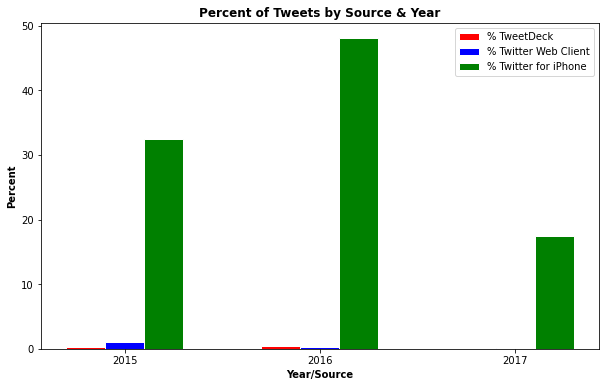

In [21]:
#Source: https://python-graph-gallery.com/11-grouped-barplot/

#import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
 
# set width of bar
barWidth = 0.2
 
# set height of bar
bars1 = [0.21, 0.36, 0.0]
bars2 = [1.03, 0.26, 0.15]
bars3 = [32.53, 48.07, 17.40]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

 
# Make the plot
plt.bar(r1, bars1, color='r', width=barWidth, edgecolor='white', label='% TweetDeck')
plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='% Twitter Web Client')
plt.bar(r3, bars3, color='g', width=barWidth, edgecolor='white', label='% Twitter for iPhone')

 
# Add xticks on the middle of the group bars
plt.xlabel('Year/Source', fontweight='bold')
plt.ylabel('Percent', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2015', '2016', '2017'])
plt.title('Percent of Tweets by Source & Year', fontweight='bold') 
    
# Create legend & Show graphic
plt.legend()
plt.show()


**INSIGHT #2:** The most frequently tweeted dog images on "We Rate Dogs" were those in the "pupper" stage, however, it should be noted that we did not have complete data for the vast majority, or 84%, of these images. Doggos came in at a distant second followed by puppos at a distant third. It appears that most people are fond of dogs in the pupper stage.

**Table 3: Count of Dogs Posted on "We Rate Dogs" by Dog Stage**

In [20]:
df.groupby(['dog_stage']).tweet_id.count()

dog_stage
doggo           63
doggopupper      8
floofer          7
pupper         203
puppo           23
Name: tweet_id, dtype: int64

**Table 4: Percent of Dogs Posted on "We Rate Dogs" by Dog Stage**

In [11]:
dog_stage_pcnt = (df.groupby(['dog_stage']).tweet_id.count()/df.shape[0]) * 100
dog_stage_pcnt

dog_stage
doggo           3.242409
doggopupper     0.411734
floofer         0.360268
pupper         10.447761
puppo           1.183736
Name: tweet_id, dtype: float64

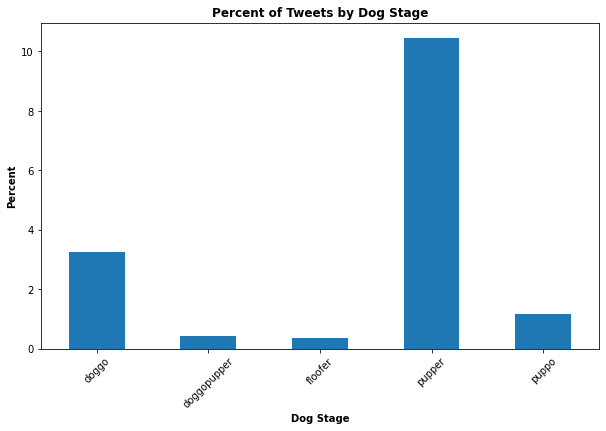

In [12]:
#Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

#Fig size
plt.figure(figsize=(10, 6))
 
# set width of bar
barWidth = 0.2

((df.groupby(['dog_stage']).tweet_id.count()/df.shape[0]) * 100).plot(kind='bar')

# Add xticks on the middle of the group bars
plt.xlabel('Dog Stage', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Percent', fontweight='bold')
plt.title('Percent of Tweets by Dog Stage', fontweight='bold') 

# Create legend & Show graphic
plt.show()

**INSIGHT #3:** The top 10 dogs appearing in tweets on "We Rate Dogs" based on the neural networks first prediction rating were: Golden Retrievers, Labrador Retrievers, Pembrokes, Chihuahuas, Pugs, Pomeranians, Toy Poodles, Samoyed, Chows, and Malamutes in that order. Retrievers appear to be the winners on the "We Rate Dogs" Twitter site.

**Table 5: Top 10 Dogs Posted on "We Rate Dogs" by Dog Type Based on Neural Network's First Prediction (p1)**

In [13]:
p1_pop = df.groupby('p1').tweet_id.count().nlargest(10)
p1_pop

p1
golden_retriever      137
Labrador_retriever     90
Pembroke               85
Chihuahua              78
pug                    51
Pomeranian             38
toy_poodle             38
Samoyed                37
chow                   37
malamute               29
Name: tweet_id, dtype: int64

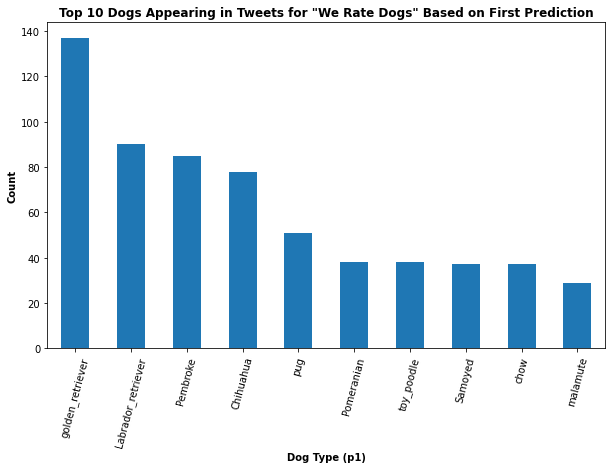

In [14]:
#Fig size
plt.figure(figsize=(10, 6))
 
# set width of bar
barWidth = 0.2

df.groupby('p1').tweet_id.count().nlargest(10).plot(kind='bar')

# Add xticks on the middle of the group bars
plt.xlabel('Dog Type (p1)', fontweight='bold')
plt.xticks(rotation=75)
plt.ylabel('Count', fontweight='bold')
plt.title('Top 10 Dogs Appearing in Tweets for "We Rate Dogs" Based on First Prediction', fontweight='bold') 

# Create legend & Show graphic
plt.show()

**INSIGHT #4:** Golden Retrievers are by far the most favorited dogs on "We Rate Dogs," followed by Labrador Retrievers and Pembrokes.

**Table 6: Top 10 Dogs Favorited on "We Rate Dogs" by Dog Type Based on Neural Network's First Prediction (p1)**

In [15]:
fav = df.groupby('p1').favorite_count.sum().nlargest(10)
fav

p1
golden_retriever      1668261
Labrador_retriever    1020595
Pembroke               960900
Chihuahua              644051
French_bulldog         447417
Samoyed                439678
pug                    311540
chow                   301552
cocker_spaniel         299498
Pomeranian             299114
Name: favorite_count, dtype: int64

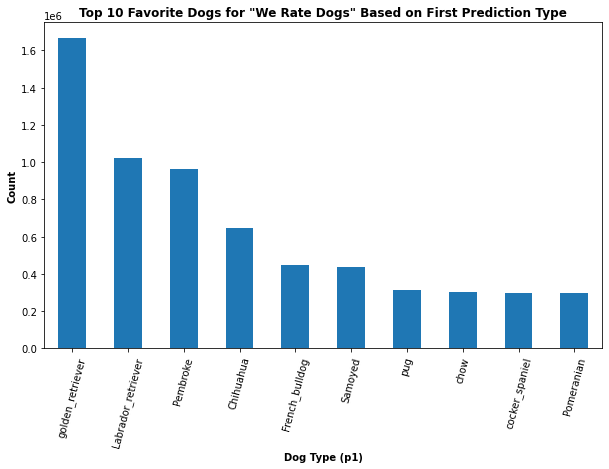

In [16]:
#Fig size
plt.figure(figsize=(10, 6))
 
# set width of bar
barWidth = 0.2

df.groupby('p1').favorite_count.sum().nlargest(10).plot(kind='bar')

# Add xticks on the middle of the group bars
plt.xlabel('Dog Type (p1)', fontweight='bold')
plt.xticks(rotation=75)
plt.ylabel('Count', fontweight='bold')
plt.title('Top 10 Favorite Dogs for "We Rate Dogs" Based on First Prediction Type', fontweight='bold') 

# Create legend & Show graphic
plt.show()

**INSIGHT #5:** Golden Retrievers are the most retweeted dogs on "We Rate Dogs," followed by Labrador Retrievers and Pembrokes.

**Table 7: Top 10 Dogs Retweeted on "We Rate Dogs" by Dog Type Based on Neural Network's First Prediction (p1)**

In [17]:
retweet = df.groupby('p1').retweet_count.sum().nlargest(10)
retweet

p1
golden_retriever      494931
Labrador_retriever    325520
Pembroke              272440
Chihuahua             212291
Samoyed               158909
French_bulldog        117874
Pomeranian            106518
cocker_spaniel         97138
pug                    96539
toy_poodle             93448
Name: retweet_count, dtype: int64

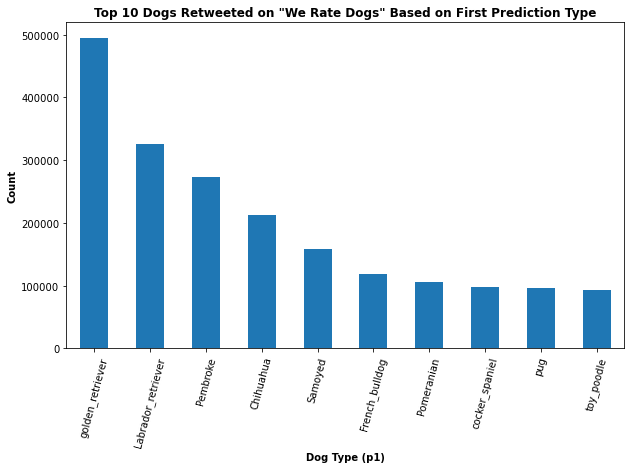

In [18]:
#Fig size
plt.figure(figsize=(10, 6))
 
# set width of bar
barWidth = 0.2

df.groupby('p1').retweet_count.sum().nlargest(10).plot(kind='bar')

# Add xticks on the middle of the group bars
plt.xlabel('Dog Type (p1)', fontweight='bold')
plt.xticks(rotation=75)
plt.ylabel('Count', fontweight='bold')
plt.title('Top 10 Dogs Retweeted on "We Rate Dogs" Based on First Prediction Type', fontweight='bold') 

# Create legend & Show graphic
plt.show()

**INSIGHT #6:** Users of the "We Rate Dogs" Twitter site are much more likely to favorite a dog than to retweet an image of a dog across all dog types. That said, the top 3 dog types favorited are the same top 3 dog types that are retweeted: Golden Retrievers, Labrador Retrievers, and Pembrokes.

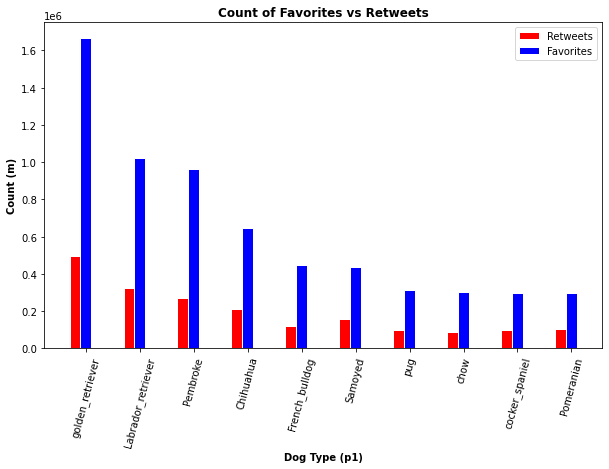

In [19]:
#import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
 
# set width of bar
barWidth = 0.2
 
# set height of bar
bars1 = [494931, 325520, 272440, 212291, 117874, 158909, 96539, 87298, 97138, 106518]
bars2 = [1668261, 1020595, 960900, 644051, 447417, 439678, 311540, 301552, 299498, 299114]


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='r', width=barWidth, edgecolor='white', label='Retweets')
plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='Favorites')

 
# Add xticks on the middle of the group bars
plt.xlabel('Dog Type (p1)', fontweight='bold')
plt.ylabel('Count (m)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(retweet))], ['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua', 'French_bulldog', 'Samoyed', 'pug', 'chow', 'cocker_spaniel', 'Pomeranian'], rotation=75)
plt.title('Count of Favorites vs Retweets', fontweight='bold') 
    
# Create legend & Show graphic
plt.legend()
plt.show()


In [ ]:
<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>